In [90]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy

from PIL import Image
from scipy import ndimage


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

np.random.seed(7)

In [91]:
%matplotlib inline

In [92]:
X_train = np.loadtxt('train_X.csv', delimiter = ',')
Y_train = np.loadtxt('train_label.csv', delimiter = ',')

X_test = np.loadtxt('test_X.csv', delimiter = ',')
Y_test = np.loadtxt('test_label.csv', delimiter = ',')

In [93]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (1000, 784)
shape of Y_train : (1000, 10)
shape of X_test : (350, 784)
shape of Y_test : (350, 10)


In [94]:
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
#nn_model.add(Dropout(0.3))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

In [95]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
nn_model.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
100/100 [==============================] - 0s 1ms/step - loss: 17.2753 - accuracy: 0.2820
Epoch 2/10
100/100 [==============================] - 0s 1ms/step - loss: 3.4528 - accuracy: 0.4820
Epoch 3/10
100/100 [==============================] - 0s 1ms/step - loss: 1.9041 - accuracy: 0.6110
Epoch 4/10
100/100 [==============================] - 0s 1ms/step - loss: 1.3058 - accuracy: 0.6110
Epoch 5/10
100/100 [==============================] - 0s 1ms/step - loss: 0.9842 - accuracy: 0.6820
Epoch 6/10
100/100 [==============================] - 0s 989us/step - loss: 0.8204 - accuracy: 0.7060
Epoch 7/10
100/100 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.7560
Epoch 8/10
100/100 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7740
Epoch 9/10
100/100 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8020
Epoch 10/10
100/100 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.7

In [97]:
scores_train = nn_model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_train[1]*100))

32/32 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.7750

accuracy: 77.50%


In [98]:
scores_test = nn_model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_test[1]*100))

11/11 [==============================] - 0s 910us/step - loss: 2.4655 - accuracy: 0.6229

accuracy: 62.29%


In [99]:
predictions = nn_model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, 5, 5, 0, 7, 0, 8, 0, 4, 0, 0, 0, 0, 8, 0, 3, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 5,
       1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 7, 6, 2, 2, 2, 2, 1, 2, 2, 6, 3, 2,
       7, 6, 2, 2, 2, 2, 2, 8, 6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 5, 3,
       3, 9, 3, 3, 3, 7, 8, 3, 3, 3, 9, 0, 3, 3, 3, 3, 1, 6, 3, 3, 3, 3,
       6, 3, 3, 8, 3, 3, 3, 4, 3, 3, 6, 3, 3, 3, 4, 3, 3, 3, 9, 9, 3, 4,
       2, 9, 9, 9, 8, 9, 9, 4, 9, 1, 9, 9, 7, 4, 9, 4, 4, 4, 9, 9, 4, 4,
       4, 9, 4, 9, 3, 4, 8, 9, 8, 8, 5, 8, 4, 5, 4, 6, 9, 6, 5, 2, 5, 5,
       4, 4, 8, 9, 8, 4, 8, 3, 0, 0, 0, 9, 5, 2, 6, 8, 8, 8, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 0, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 9,
       7, 8, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 2, 9, 7, 7, 7, 6, 9,
       7, 4, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 1, 8, 5, 3, 0, 8, 3, 8, 8,
       3, 5, 8, 8, 8, 8, 8, 6, 9, 8, 8, 4, 8, 1, 8,

In [100]:
X_test.shape

(350, 784)

In [101]:
predictions

array([0, 0, 0, 5, 5, 0, 7, 0, 8, 0, 4, 0, 0, 0, 0, 8, 0, 3, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 5,
       1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 7, 6, 2, 2, 2, 2, 1, 2, 2, 6, 3, 2,
       7, 6, 2, 2, 2, 2, 2, 8, 6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 5, 3,
       3, 9, 3, 3, 3, 7, 8, 3, 3, 3, 9, 0, 3, 3, 3, 3, 1, 6, 3, 3, 3, 3,
       6, 3, 3, 8, 3, 3, 3, 4, 3, 3, 6, 3, 3, 3, 4, 3, 3, 3, 9, 9, 3, 4,
       2, 9, 9, 9, 8, 9, 9, 4, 9, 1, 9, 9, 7, 4, 9, 4, 4, 4, 9, 9, 4, 4,
       4, 9, 4, 9, 3, 4, 8, 9, 8, 8, 5, 8, 4, 5, 4, 6, 9, 6, 5, 2, 5, 5,
       4, 4, 8, 9, 8, 4, 8, 3, 0, 0, 0, 9, 5, 2, 6, 8, 8, 8, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 0, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 9,
       7, 8, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 2, 9, 7, 7, 7, 6, 9,
       7, 4, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 1, 8, 5, 3, 0, 8, 3, 8, 8,
       3, 5, 8, 8, 8, 8, 8, 6, 9, 8, 8, 4, 8, 1, 8,

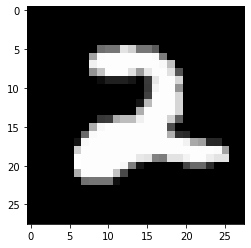

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import random

idx = 100
x_val = X_test.T
plt.imshow(x_val[:, idx].reshape((28, 28)),cmap='gray')
plt.show()


In [106]:

k = X_test[idx, :]

In [107]:
k = k.reshape((28, 28))

In [108]:
print('Label is {label}'.format(label=(predictions[idx], np.argmax(X_test, axis = 1)[index])))
#plt.imshow(k, cmap='gray')

Label is (2, 184)


In [109]:
label=(predictions[idx])

In [110]:
print(label)

2


In [89]:
print(index)

349
